In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
fb = pd.read_csv('nysu_10902_2019_research_right.csv')
politics = pd.read_csv('9th_legislator_promise.csv')

In [2]:
politics['姓名'].unique()

array(['吳思瑤', '姚文智', '何志偉', '蔣萬安', '李彥秀', '林昶佐', '蔣乃辛', '費鴻泰', '賴士葆',
       '呂 孫 綾', '林 淑 芬', '高志鵬', '余天', '吳 秉 叡', '蘇 巧 慧', '張 宏 陸', '羅 致 政',
       '江 永 昌', '林 德 福', '吳 琪 銘', '羅 明 才', '黃 國 昌', '蔡適應', '鄭 運 鵬',
       '陳賴素美', '陳學聖', '鄭寶清', '呂玉玲', '趙正宇', '林為洲', '柯建銘', '陳超明', '徐志榮',
       '蔡其昌', '顏寬恒', '洪慈庸', '張廖萬堅', '盧秀燕', '沈智慧', '黃國書', '何欣純', '江啟臣',
       '王惠美', '柯呈枋', '黃秀芳', '洪宗熠', '陳素月', '馬 文 君', '許 淑 華', '蘇 治 芬',
       '劉 建 國', '李 俊 俋', '蔡 易 餘', '陳 明 文', '葉宜津', '黃偉哲', '郭國文  ', '陳亭妃',
       '林俊憲', '王定宇', '邱 議 瑩', '邱 志 偉', '劉 世 芳', '林 岱 樺', '管 碧 玲', '李 昆 澤',
       '趙 天 麟', '馬 凱 妮', '賴 瑞 隆', '蘇震清', '鍾佳濱', '莊瑞雄', '陳歐珀', '蕭美琴',
       '劉櫂豪', '楊 曜', '楊鎮浯', '陳玉珍', '陳雪生', '廖國棟', '鄭天財', '陳瑩', '高金素梅',
       '簡東明', '孔文吉'], dtype=object)

In [3]:
fb['page_name'].unique()

array(['陳學聖', '陳明文', '蔡其昌', '趙天麟', '許淑華', '林昶佐 Freddy Lim', '蔡適應', '葉宜津',
       '蘇震清', '李昆澤', '柯呈枋', '陳亭妃', '顏寬恒', '陳賴素美 粉絲團', '呂孫綾', '立法委員 江永昌',
       '徐志榮', '陳玉珍 珍愛金門', '沈智慧', '賴瑞隆', '趙正宇', '蕭美琴 Bi-khim Hsiao', '洪慈庸',
       '管碧玲 (kuanbiling)', '李俊俋', '吳琪銘', '吳思瑤', '林岱樺', '江啟臣', '鄭寶清',
       '賴士葆', '邱志偉', '蘇巧慧', '黃秀芳', '王定宇', '張宏陸', '堅持．張廖萬堅', '李彥秀', '林德福',
       '黃國昌', '林淑芬', '立法委員林為洲', '蔡易餘 家己人', '愛信任-劉世芳', '高雄小金剛許智傑', '蘇治芬',
       '羅致政粉絲團', '羅明才', '劉建國', '何欣純', '立法委員 呂玉玲', '黃國書', '吳秉叡', '劉櫂豪',
       '柯建銘'], dtype=object)

In [4]:
lai = fb[fb.page_name == "賴士葆"]
lai['new_date'] = pd.to_datetime(lai['created_time_taipei']).dt.date
lai['post_hour'] = pd.to_datetime(lai['created_time_taipei']).dt.hour
lai['month_year'] = pd.to_datetime(lai['new_date']).dt.to_period('M')
lai.head(1)

<ipython-input-4-66fb04716b7a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lai['new_date'] = pd.to_datetime(lai['created_time_taipei']).dt.date
<ipython-input-4-66fb04716b7a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lai['post_hour'] = pd.to_datetime(lai['created_time_taipei']).dt.hour
<ipython-input-4-66fb04716b7a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
14740,1573873889493647_2261214444092918,1573873889493647,賴士葆,公眾人物,蔡英文昨天首度透露決策過程，表示她不同意管中閔上台的立場，她說行政院在事後檢討過程時還討論可...,NaN,link,https://www.facebook.com/1573873889493647/post...,2019-01-15T08:22:23+0000,2019-01-15T16:22:23,...,0,0,0,0,0,133,93,2019-01-15,16,2019-01


In [8]:
#1,賴士葆在臉書發文時間分佈
post_time = lai[['post_id','post_hour']].groupby('post_hour').count()
post_time.index.name = 'post_hour'
post_time.reset_index(inplace = True)
post_time

,post_hour,post_id
0,0,2
1,4,2
2,5,1
3,6,16
4,7,23
5,8,27
6,9,141
7,10,69
8,11,43
9,12,27


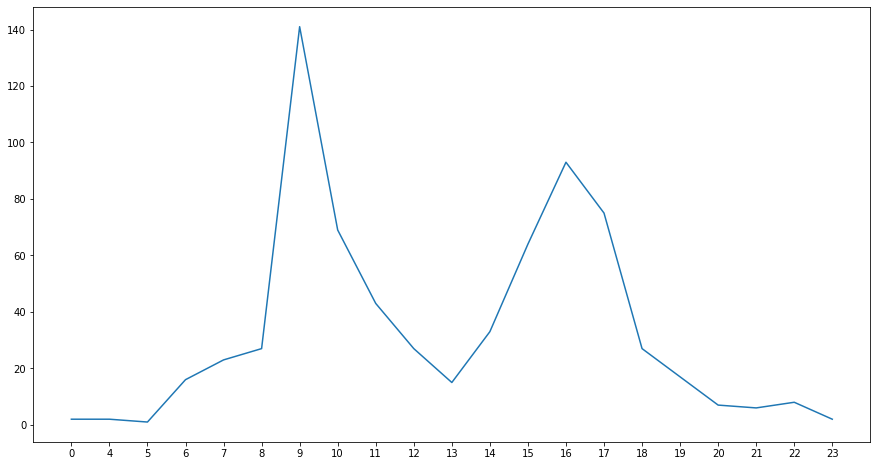

In [9]:
#畫出整年貼文的時間分佈
labels = post_time['post_hour'].map(str)


fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax.plot(labels, post_time['post_id'])

plt.show()

In [ ]:
#可看出發文時間有兩個高峰，一個是早上九點，一個是下午四點。

In [10]:
#2,整年貼文數量分佈
whole_year = lai[['post_id','month_year']].groupby('month_year').count()
whole_year.index.name = 'month_year'
whole_year.reset_index(inplace=True)
whole_year

,month_year,post_id
0,2019-01,39
1,2019-02,29
2,2019-03,56
3,2019-04,68
4,2019-05,48
5,2019-06,39
6,2019-07,42
7,2019-08,64
8,2019-09,69
9,2019-10,89


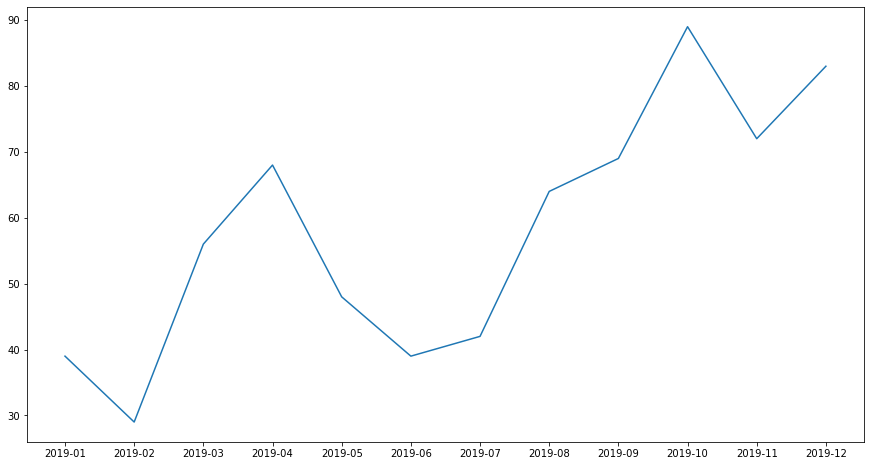

In [13]:
#畫出整年貼文分佈
labels = whole_year['month_year'].map(str)


fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax.plot(labels, whole_year['post_id'])

plt.show()

In [14]:
#可看出發文高峰在11-12月，因為是選舉的季節

In [15]:
#3,每個月的按讚、評論、分享總數 分佈
results = lai.groupby('month_year').sum()
results.index.name = 'newhead'
results.reset_index(inplace=True)
results

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
0,2019-01,61381081690252264,23422,0,0,0,0,0,2341,2793,510
1,2019-02,45642342795315784,22893,0,0,0,0,0,5966,2435,410
2,2019-03,88136937811644272,91546,0,0,0,0,0,16540,9047,778
3,2019-04,107023424485568048,90907,0,0,0,0,0,13482,5241,874
4,2019-05,75545946695695088,65554,0,0,0,0,0,14252,5419,633
5,2019-06,61381081690252264,72910,0,0,0,0,0,6327,5118,538
6,2019-07,66102703358733208,120158,0,0,0,0,0,14637,7623,535
7,2019-08,100727928927593456,134039,0,0,0,0,0,11834,8819,816
8,2019-09,108597298375061696,179056,0,0,0,0,0,12999,9825,848
9,2019-10,140074776164934656,168091,0,0,0,0,0,11691,10334,1059


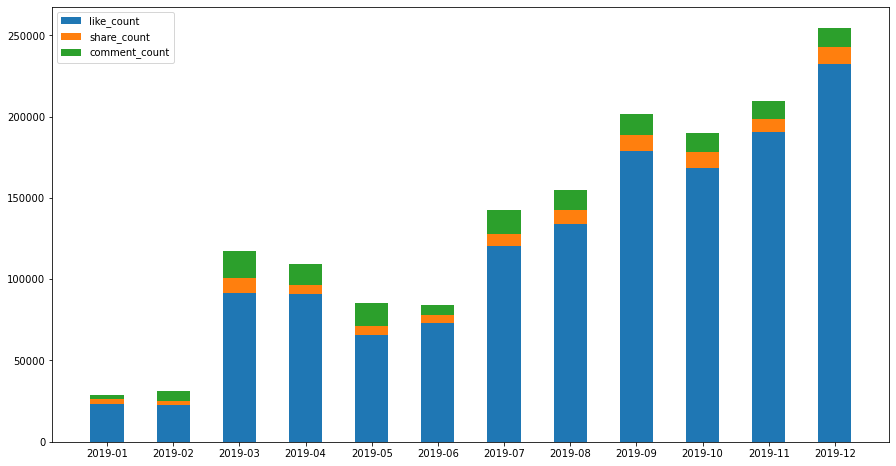

In [16]:
#4,整年按讚、評論、分享數

labels = results['newhead'].map(str)
width = 0.5       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.bar(labels, results['like_count'], width, label='like_count')
ax.bar(labels, results['share_count'], width, label='share_count', bottom=results['like_count'])
ax.bar(labels, results['comment_count'], width, label='comment_count', bottom=results['share_count']+results['like_count'])
#ax.plot(labels, whole_year['post_id'])

ax.legend()
plt.show()

In [38]:
#5,找出12月的文章讚的分佈
December=lai[lai.month_year == "2019-12"]

In [29]:
results_dec =December.groupby('new_date').sum()
results_dec

,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
new_date,,,,,,,,,,
2019-12-01,4721621668480941,10255,0,0,0,0,0,530,532,49
2019-12-02,3147747778987294,3600,0,0,0,0,0,276,464,25
2019-12-03,6295495557974588,18131,0,0,0,0,0,1827,1062,51
2019-12-04,4721621668480941,6941,0,0,0,0,0,645,391,36
2019-12-05,4721621668480941,8234,0,0,0,0,0,629,639,31
2019-12-06,4721621668480941,7674,0,0,0,0,0,565,468,35
2019-12-07,1573873889493647,3130,0,0,0,0,0,235,226,7
2019-12-08,4721621668480941,7812,0,0,0,0,0,379,223,39
2019-12-09,4721621668480941,5378,0,0,0,0,0,334,700,50


In [30]:
results_dec.index.name = 'newhead'
results_dec.reset_index(inplace=True)
results_dec

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
0,2019-12-01,4721621668480941,10255,0,0,0,0,0,530,532,49
1,2019-12-02,3147747778987294,3600,0,0,0,0,0,276,464,25
2,2019-12-03,6295495557974588,18131,0,0,0,0,0,1827,1062,51
3,2019-12-04,4721621668480941,6941,0,0,0,0,0,645,391,36
4,2019-12-05,4721621668480941,8234,0,0,0,0,0,629,639,31
5,2019-12-06,4721621668480941,7674,0,0,0,0,0,565,468,35
6,2019-12-07,1573873889493647,3130,0,0,0,0,0,235,226,7
7,2019-12-08,4721621668480941,7812,0,0,0,0,0,379,223,39
8,2019-12-09,4721621668480941,5378,0,0,0,0,0,334,700,50
9,2019-12-10,4721621668480941,10852,0,0,0,0,0,657,534,30


No handles with labels found to put in legend.


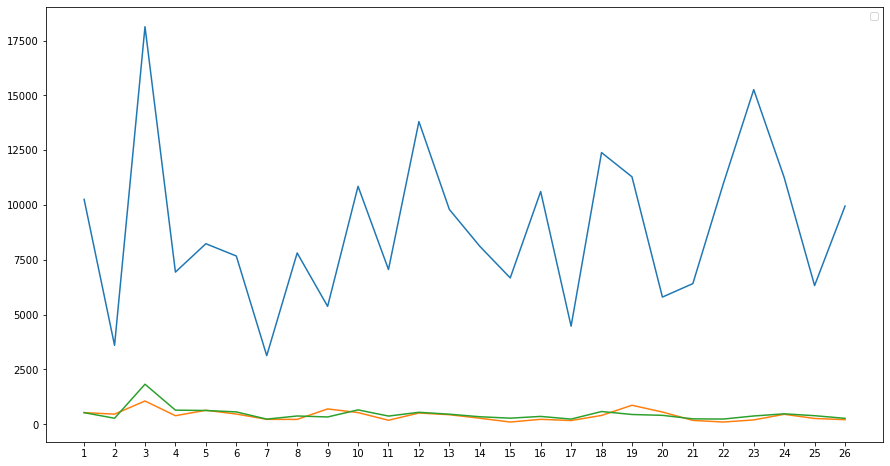

In [40]:
#找出12月的文章讚的分佈（圖表）

labels = [str(i) for i in range(1,len(results_dec)+1)]                                
                                
fig,ax= plt.subplots()
fig.set_size_inches(15, 8)

ax.plot(labels, results_dec['like_count'])
ax.plot(labels, results_dec['share_count'])
ax.plot(labels, results_dec['comment_count'])

ax.legend()

plt.show()

In [37]:
#12/1 號很明顯讚很多，所以找出這天的文章
lai['new_date']=lai['new_date'].map(str) # turn 'new_date' into str
Dem_3 = lai[lai['new_date'] == "2019-12-03"]
Dem_3[['message','like_count']].replace(r'\n', ' ', regex = True)

<ipython-input-37-22258a4819f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lai['new_date']=lai['new_date'].map(str) # turn 'new_date' into str


,message,like_count
15368,謝長廷擔任駐日代表以來，從來沒有出現正面的新聞，負面的新聞卻是一堆。謝長廷有很多次機會可以自...,6430
15369,外交部吳部長不理會外面群眾的抗議，居然還要警衛把我擋在電梯𥚃面，不讓我上去找部長！,4272
15370,貧富差距連網軍界都大得嚇人，有的可以拿標案領1450萬，有人卻只能固定月領一萬？ #助日代表...,1731
15371,『1458逼死大阪處長，蔡英文謝長廷沒責任？』記者會,5698


In [41]:
#發現當天有兩篇貼文是在批評謝長廷、蔡英文，所以容易得到認同者的讚。

In [42]:
#6,從列出評論數（互動數）最高的一天
comment_top20 = lai.sort_values('comment_count',ascending=False).head(10)
comment_top20 = comment_top20[['message','comment_count']]
comment_top20 = comment_top20.replace(r'\n',' ',regex=True) # message text preprocessing
comment_top20

,message,comment_count
14851,「將阿扁關回中監」木新市場聯署,4530
14797,原來掃把可以當作武器捍衛中華民國，下次國防預算要多編一些經費採購掃把。,3538
15055,請大家都來動員支持韓國瑜參選總統並羸得最後勝利！,2957
14977,國民黨團針對同婚法案會後記者會,2023
14853,發動「將阿扁關回中監」連署,1782
14956,蔡英文把總統變成皇帝，她是戕害民主最大的元兇，號稱民主國家，在她主政之下，全然踐踏民意，她的...,1468
14836,「將阿扁關回中監」景美市場聯署 歡迎大家加入賴士葆的Line@：http://abao.t...,1391
15050,軍紀徹底敗壞！ 國家安全局變菸酒公賣局 記者會,1367
15111,『只准蔡英文上班拜廟，不許韓國瑜假日拜票』記者會,1314
14978,蔡政府為鞏固政權不擇手段 國家瀕失序 #嚴格公投不尊重民意 #黑手干預獨立機關 #箝制言論自...,1241


In [43]:
#可以看出最多的是關於陳水扁前總統，是容易被討論的話題，因此得到許多的回應。

In [55]:
#7,比較、查看他政見
pd.set_option('display.max_colwidth', None)#setting the maximize string show
promise = politics[politics.姓名 == "賴士葆"].政見.to_string()
re.split('。 |：', promise) # skip this, just to make it easier to read

['8    1.在九二共識、一中各表的基礎下，推動兩岸和平發展 2.推動內閣制、恢復閣揆同意權 3.推動國會攺革',
 '朝野協商透明化，提升立法效率、國會議長中立化 4.成立兩岸協議監督特種委員會 5.積極推動加入國際組織，先TPP後RCEP 6.爭取勞工福祉，推動提高基本工資，放寬勞保投保上限 7.推動金融3.0（FINTECH），如網路銀行、第三方支付、全面提升金融競爭力 8.健全國際策略投資，推動成立國家主權基金 9.確保學生就學權利，如學貸延長五年還款，催生學生家長代表三分之一，參與教育政策決策 10.持續加速推動捷運南環線 11.推動智慧食安新紀元，如食安雲 12.優化青年創業環境，推動天使基金規模提升至百億元 13.推動長照保險法 14.堅決反對廢死，反對廢刑法第227條 15.推動住院醫師工作權益納入勞基法']

In [46]:
#政見大多與推廣兩岸關係為主，得到比較多讚的貼文則是與支持韓國瑜、批評民進黨為主。

In [57]:
#8,找出整年貼文分享數最高的貼文 
share_top10 = lai.sort_values('share_count',ascending=False).head(10)
share_top10 = share_top10[['message','share_count']]
share_top10 = share_top10.replace(r'\n',' ',regex=True) # message text preprocessing
share_top10

,message,share_count
14851,「將阿扁關回中監」木新市場聯署,1924
14846,來來來!老師上課有沒有在聽! 歡迎大家加入賴士葆的Line@：http://abao.tw/line #什麼是ASEAN #誰在主導RCEP #TPP呢 #新南向政策何去何從,1091
15174,NaN,1025
14797,原來掃把可以當作武器捍衛中華民國，下次國防預算要多編一些經費採購掃把。,1006
14841,將阿扁關回去，大家一起來連署! 動動手指頭點下去 👉 http://abao.tw/ab/ 歡迎大家加入賴士葆的Line@：http://abao.tw/line,934
15003,NaN,930
14853,發動「將阿扁關回中監」連署,880
15107,NaN,858
14991,每每無力抵擋民進黨屢次利用國會多數的優勢，以坦克壓境的方式，通過一次又一次的惡法，身為立法委員那種痛徹心扉的感覺，難以言喻。過去民進黨罵公投是鳥籠要求修改公投法降低門檻，現在卻是要修法來提高門檻。6月中旬臨時會要強行通過公投惡法，民進黨要收回全民透過公投來展現人民作主的權利，民進黨用技術性來封殺公投。手段如下：1.不惜違反隱私權，要交出身分證，讓民眾心生畏懼。2.讓公投與大選日脫鉤，讓投票人數減少。3.嚴定每兩年才舉行1次公投。這樣限縮行使直接民權，以維護政黨的最高利益。這些詭詐的心機是認定民進黨會永續執政，如果2020民進黨在野了，肯定悔不當初將公投法修惡來作繭自縛。引用呂秀蓮對民進黨沉痛的呼籲，「不要打著民主，背叛民主」，請三思要將公投法回收所附的沉痛代價。 https://udn.com/news/story/6656/3852453 https://udn.com/news/story/6656/3852453?from=udn-ch1_breaknews-1-0-news,836
15055,請大家都來動員支持韓國瑜參選總統並羸得最後勝利！,806


In [58]:
#得到較多分享數的貼文也同樣得到比較多讚數，一樣大多是批判性的貼文，除了宣傳官方line帳號的貼文。

In [59]:
#9,整年貼文總按讚數最高的十篇
like_top10 = lai.sort_values('like_count',ascending=False).head(10)
like_top10 = like_top10[['post_id','message','like_count']]
like_top10 = like_top10.replace(r'\n',' ',regex=True) # message text preprocessing
like_top10

,post_id,message,like_count
15323,1573873889493647_2491893644358329,韓國瑜、賴士葆聯合兢選總部將於11月30日(星期六)上午成立，八點半開始進場，歡迎大家蒞臨指導！ 地點：￼羅斯福路五段111號￼ 電話：2935-5358， 23588166,17728
15055,1573873889493647_2385554091658952,請大家都來動員支持韓國瑜參選總統並羸得最後勝利！,15618
14851,1573873889493647_2737837072902536,「將阿扁關回中監」木新市場聯署,12125
14841,1573873889493647_2305838576297171,將阿扁關回去，大家一起來連署! 動動手指頭點下去 👉 http://abao.tw/ab/ 歡迎大家加入賴士葆的Line@：http://abao.tw/line,11096
15006,1573873889493647_784891945338446,民進黨真的是「權力中毒」！,10494
15190,1573873889493647_2427639587450402,NaN,10410
15059,1573873889493647_491630728074515,力挺韓國瑜以訟止謗,9771
15377,1573873889493647_2497900053757688,今天賴士葆競選總部成立，陽光普照，很多貴賓及 4千多位支持賴士葆的好朋友來到現場加油打氣，三個小時加油當選聲不斷，跟周邊的鄰居說聲對不起，打擾大家了，感謝200多位志工好友的幫忙協助諸多繁雜的工作，還有徹夜未眠的賴士葆服務團隊的伙伴們，大家辛苦了，很多貴賓來到現場，士葆忙著台上台下穿梭，無法一一接待與致意，有所怠慢之處敬請見諒。還剩四十天，大家一起努力向前衝，go go go！,9661
15025,1573873889493647_445150702974704,參加凱道反對蔡英文没收公投活動,9474
15102,1573873889493647_362103544459092,美國AIT處長酈英傑訪韓，蔡英文抓狂？,9275


In [60]:
#貼文總讚數最高的十篇貼文，大多與韓國瑜有關，其他的貼文是以批評蔡英文為主。

In [52]:
#10,整年按讚次數最少的十篇貼文 
lastlike_10 = lai.sort_values(by = ['like_count'],ascending = True).head(10)
lastlike_10[['message','like_count','month_year']].replace(r'\n',' ',regex=True)

,message,like_count,month_year
14928,NaN,21,2019-04
15414,NaN,28,2019-12
14822,好有創意！ 世界經濟論壇 (World Economic Forum) PO 出這樣一則影片，挪威一個叫做Rjukan的小鎮，由於身處峽谷之中，一年有很多時間照不到陽光，於是他們裝了好幾片大鏡子，讓陽光能夠反射到小鎮裡，帶給大家光明與希望。 #不過鏡子不便宜要85萬美金,79,2019-03
14743,今早跟粉絲們分享在美國消費性電子展 (CES)上展出的自動摺衣服機後，很高興的跟老婆說分享。沒想到老婆平淡的回了我一句：「有你就夠啦！」我被打臉了...哭哭....哈哈！ #國家政策是以核養綠 #我家政策是以手養綠 #老婆說的話都要聽從,108,2019-01
14940,媒體報導賴清德在日本訪問表示，若當選總統將推動日本食品進口解禁，接著賴清德辦公室更正說：「這樣的說法與事實不符。」賴清德表示要尊重公投的結果，兼顧國人在意的食安問題，然後又說也要兼顧與其他國家的國際貿易，他說：「國際有一定標準，台灣要參加CPTPP(跨太平洋夥伴全面進展協定)，也要根據國際標準，不可以自設門檻，這樣沒辦法參加CPTPP。」這就是政治人物的兩面手法，想要討好選票，又要討好日本人，到底怎麼兼顧，這兩者之間就是悖逆不能共存的，不想犧牲國人的健康，不希望吃核災食品就是自設門檻，這是什麼道理！民進黨政府一向是嘴巴說尊重公投的結果，但是實際上不理會公投的結果，同婚議題和以核養綠照樣我行我素就是證明。 https://udn.com/news/amp/story/12539/3508726,148,2019-05
14832,這....才是創新！垃圾車配電音真的不一樣！,151,2019-03
14759,創世、華山、人安基金會每年在歲末年終的時候舉辦尾牙餐會，關懷寒士、街友等獨居長輩，已經進入第29屆，參加的人數每年創新高，高達數萬人的餐會，這應該是世界難得一見的奇景。我每年都支持並參加這個有意義的活動，也肯定主辦單位的用心，井然有序的辦理如此大型的餐會。深刻的感受到各界的愛心關懷，大家不分顏色共襄盛舉，慷慨解囊，讓這些孤苦無依的長者可以飽餐一頓。讓人憂心的是每年餐會人數快速激增的背後隱藏的事情更需要關懷，社會的老化，獨居老人散居在不知名的角落，他們的需求是比餐會更加需要嚴肅看待的社會問題。我們的長照達成多少獨居老人的照顧？ https://www.chinatimes.com/realtimenews/20190127001567-260407,158,2019-01
15151,陸客不來，政府卯起來搶國際客，撒錢、補助、免簽樣樣來，用納稅人的錢不停的補助，衝高觀光旅客量，根本無暇顧及東南亞旅客滯留、打工、賣淫等社會問題。陸客不來衝擊兩百萬個家庭，觀光慘業哀鴻遍野，歇業關門一堆，觀光業成兩岸關係惡化的犧牲品。2016年觀光業者走上街頭，訴求「要工作、求溫飽」，三年過去，情況沒有改善，政府想破頭，想哪裡還可以補助、獎勵、補貼。政府也一再宣稱觀光人數創新高，不懂為什麼業者叫苦連天。現在又想把觀光局升格觀光署，擴大編制員額，提高預算，認為這樣就可以救觀光。口號喊得很響亮，要觀光立國推展國際觀光，處心積慮的要把觀光局變成觀光署，以為觀光產業就會一飛沖天，這些都是治標不是治本的方法。仇中反中的政策，阻礙兩岸良性的互動交流，蔡政府意識形態治國，從事觀光業的兩百萬個家庭也被挾持綁架了，這些家庭要的非關藍綠，只是卑微的要一份餬口的工作，可以讓一家溫飽，卻不可得。 https://udn.com/news/amp/story/120699/4014002,169,2019-08
15074,NaN,197,2019-08
14755,環團昨天公布臭氧年報，不只高屏是重災區，一年超標上百天，雙北還有其他區也淪陷。臭氧和PM2.5被認為是嚴重的致癌物，當全台到處都是空汙爆表，民眾唯一的自保之道就是戴口罩。但是剛剛行政院消保處公布抽查市售防止PM2.5的口罩，25件當中有23件品質不合規定，不合格比例高達9成2，消費者配戴了反易致癌，好悲慘哪！所以過去我們戴了口罩好像是被裝肖維，戴口罩的後果更慘，是這樣嗎？經濟部的標準檢驗局說，針對口罩防止PM2.5的規範最遲要到2020年才可納入強制列檢，通過檢驗才能在市面上販售。這個關乎民眾身心健康的最起碼的配件，要再等兩年才能有讓人安心的口罩，或許這是極度艱澀深奧的科學關鍵技術，還在繼續的研發才能上市，老百姓的爛命一條，只能自求多福了。 https://udn.com/news/amp/story/7266/3622518,198,2019-01


In [53]:
#一年中貼文讚數最低的十篇貼文，大多是討論政策或是宣傳活動。

In [54]:
#11,賴士葆委員以何種形式發文會得到比較多留言數？
toplike_50 = lai.sort_values(by = ['comment_count'],ascending=False).head(50)
toplike_50.groupby('type').count()

,post_id,page_id,page_name,page_category,message,story,permalink,created_time_gmt,created_time_taipei,link_url,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
type,,,,,,,,,,,,,,,,,,,,,
link,3,3,3,3,3,0,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
photo,5,5,5,5,4,0,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
status,3,3,3,3,3,2,3,3,3,0,...,3,3,3,3,3,3,3,3,3,3
video,39,39,39,39,38,38,39,39,39,39,...,39,39,39,39,39,39,39,39,39,39


In [ ]:
#很特別的是，賴士葆委員發布的影片得到的留言數比相片的留言數多很多，回到賴士葆委員的臉書，發現賴士葆委員非常發布質詢影片以及直播，所以更容易得到很多留言數。